In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import optimize as op
import os


KeyboardInterrupt: 

In [2]:
def powerlaw(x,A,Gamma):
    return A*pow(x,-Gamma)

In [ ]:
folder='gamma'
try:
     os.mkdir(folder)
except FileExistsError:
    print("folder exits")
path=str('./'+folder+'/')

In [55]:
ebin=60
rbin=20
tbin=6400

e=np.genfromtxt("powerlog.dat")
dp=np.genfromtxt("Nrefl_inci.dat")
'''
e=np.genfromtxt("./e600/powerlog.dat")
dp=np.genfromtxt("./e600/refl_inci.dat")
'''
fp=np.zeros((ebin,rbin,tbin),dtype='double')
fp2=np.zeros((ebin,rbin,tbin),dtype='double')

In [56]:

idx=0
for k in range(tbin):
    rindx=0
    for j in range(rbin):
        for i in range(ebin):
            fp[i][j][k]=dp[k][2*i+1+rindx]
            idx+=1
        rindx+=2*ebin

[1.452600e-04 3.761050e-05 4.735050e-05 5.961000e-05 7.504450e-05
 9.447550e-05 1.189375e-04 1.497340e-04 1.885030e-04 2.373100e-04
 2.987645e-04 3.761050e-04 4.735050e-04 5.961000e-04 7.504450e-04
 9.447550e-04 1.189375e-03 1.497340e-03 1.885030e-03 2.373100e-03
 2.987645e-03 3.761050e-03 4.735050e-03 5.961000e-03 7.504450e-03
 9.447550e-03 1.189375e-02 1.497340e-02 1.885030e-02 2.373100e-02
 2.987645e-02 3.761050e-02 4.735050e-02 5.961000e-02 7.504450e-02
 9.447550e-02 1.189375e-01 1.497340e-01 1.885030e-01 2.373100e-01
 2.987645e-01 3.761050e-01 4.735050e-01 5.961000e-01 7.504450e-01
 9.447550e-01 1.189375e+00 1.497340e+00 1.885030e+00 2.373100e+00
 2.987645e+00 3.761050e+00 4.735050e+00 5.961000e+00 7.504450e+00
 9.447550e+00 1.189375e+01 1.497340e+01 1.885030e+01 9.165255e+01]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 4.21389743e+03 0.00000000e+00 5.31766395e+03
 4.22382023e+03 6.710283

fp [energy] [r_position] [time]

Text(0, 0.5, 'counts')

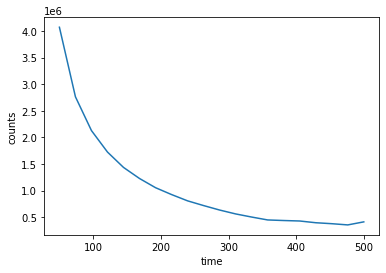

In [48]:
total=np.zeros(rbin)
for i in range(rbin):    
    for k in range(tbin):
        for j in range(ebin):
            total[i]+=fp[j][i][k]
            
rindex=np.linspace(50,500,20)
rindex=rindex[::-1]#序数 0 为最外环

fig,ax=plt.subplots()
ax.plot(rindex,total)
#plt.xlim(0.5,0.6)
plt.xlabel('radius')
plt.ylabel('counts')
plt.title('counts respect to radius')
plt.savefig(path+'counts_r.jpg')

Text(0, 0.5, 'counts')

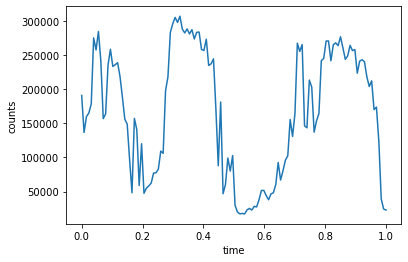

In [49]:
total=np.zeros(tbin)
for k in range(tbin):
    for i in range(rbin):
        for j in range(ebin):
            total[k]+=fp[j][i][k]
            
rindex=np.linspace(50,500,20)
rindex=rindex[::-1]
tindx=np.linspace(0,100,tbin)
fig,ax=plt.subplots()
ax.plot(tindx,total)
#plt.xlim(0.5,0.6)
plt.xlabel('time')
plt.ylabel('counts')
plt.title('counts respect to time')
plt.savefig(path+'counts_t.jpg')